In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [4]:
df = pd.read_csv('Korean_demographics_2000-2022.csv')
df.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [7]:
df.Region.unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan',
       'Whole country'], dtype=object)

In [11]:
countrywide = df[df.Region == "Whole country"].copy()
countrywide.shape

(270, 12)

In [12]:
countrywide.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
17,1/1/2000,Whole country,61644.0,15.37,24457.0,6.1,9045.0,2.3,30120.0,7.5,37187.0,9.3
35,2/1/2000,Whole country,56723.0,15.11,20306.0,5.4,9392.0,2.5,26187.0,7.0,36417.0,9.7
53,3/1/2000,Whole country,59878.0,14.91,21592.0,5.4,10878.0,2.7,30418.0,7.6,38286.0,9.5
71,4/1/2000,Whole country,53058.0,13.64,20420.0,5.2,8640.0,2.2,28179.0,7.2,32638.0,8.4
89,5/1/2000,Whole country,52492.0,13.04,19862.0,4.9,10210.0,2.5,35330.0,8.8,32630.0,8.1


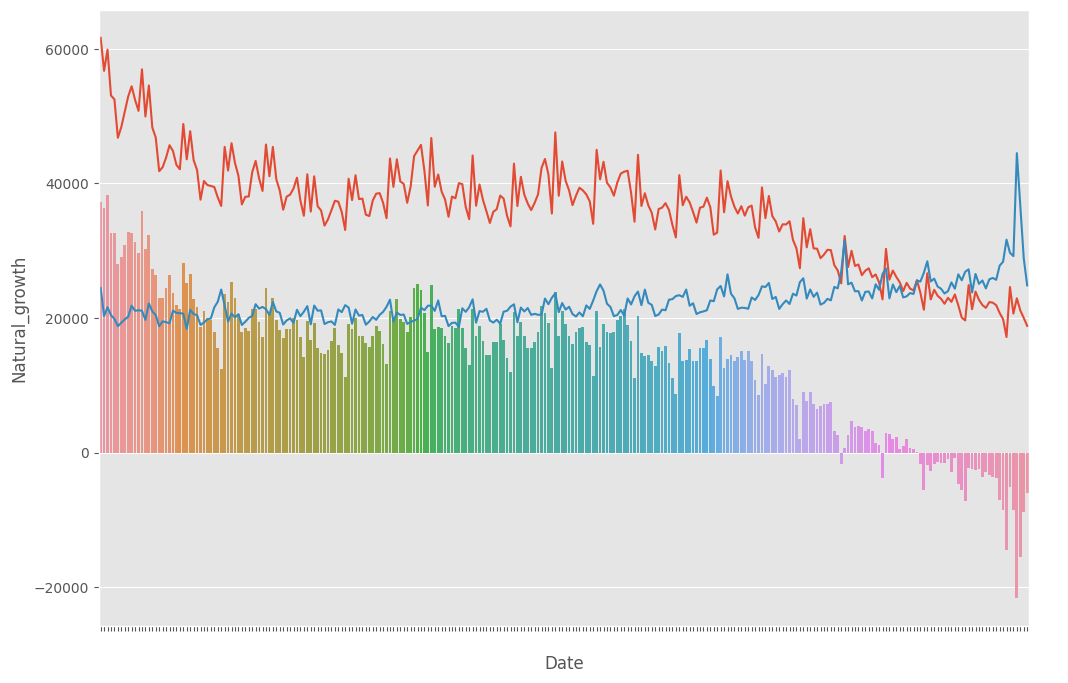

In [20]:
plt.figure(figsize=(12,8))

# sns.lineplot(data=countrywide, x='Date', y='Marriage')
sns.lineplot(data=countrywide, x='Date', y='Birth')
sns.lineplot(data=countrywide, x='Date', y='Death')
sns.barplot(data=countrywide, x='Date', y='Natural_growth')

plt.xticks(color='w')
plt.show()

In [26]:
countrywide['birth_rolling'] = countrywide['Birth'].rolling(12).mean()
countrywide['death_rolling'] = countrywide['Death'].rolling(12).mean()
countrywide['natural_growth_rolling'] = countrywide['Natural_growth'].rolling(12).mean()

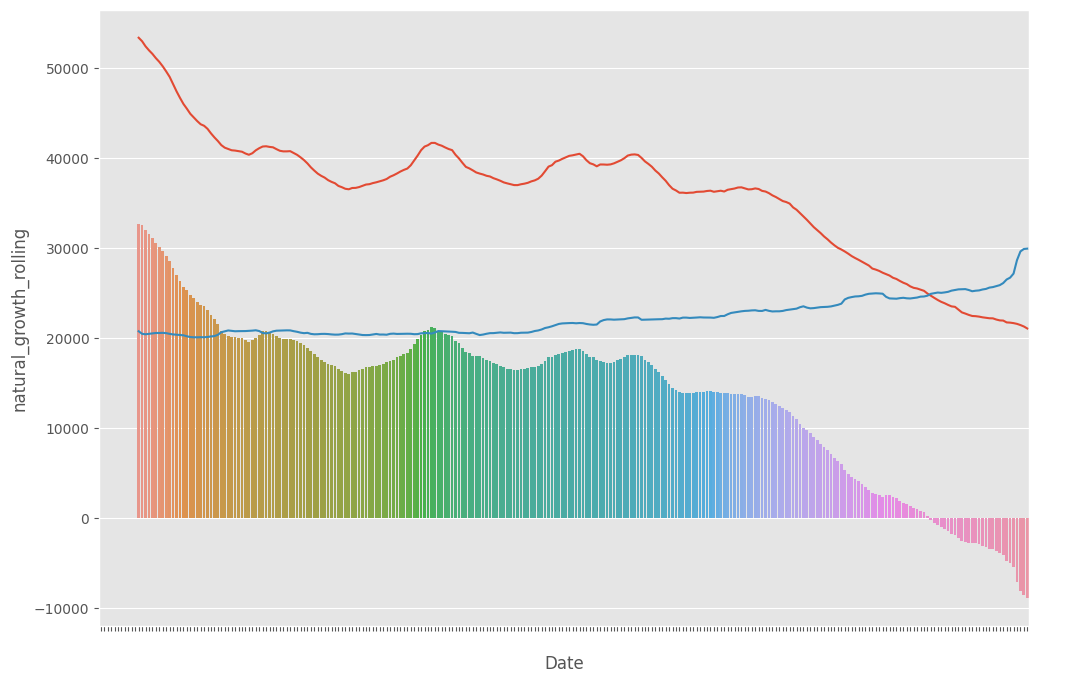

In [27]:
plt.figure(figsize=(12,8))

sns.lineplot(data=countrywide, x='Date', y='birth_rolling')
sns.lineplot(data=countrywide, x='Date', y='death_rolling')
sns.barplot(data=countrywide, x='Date', y='natural_growth_rolling')

plt.xticks(color='w')
plt.show()

In [28]:
countrywide['marriage_rolling'] = countrywide['Marriage'].rolling(12).mean()

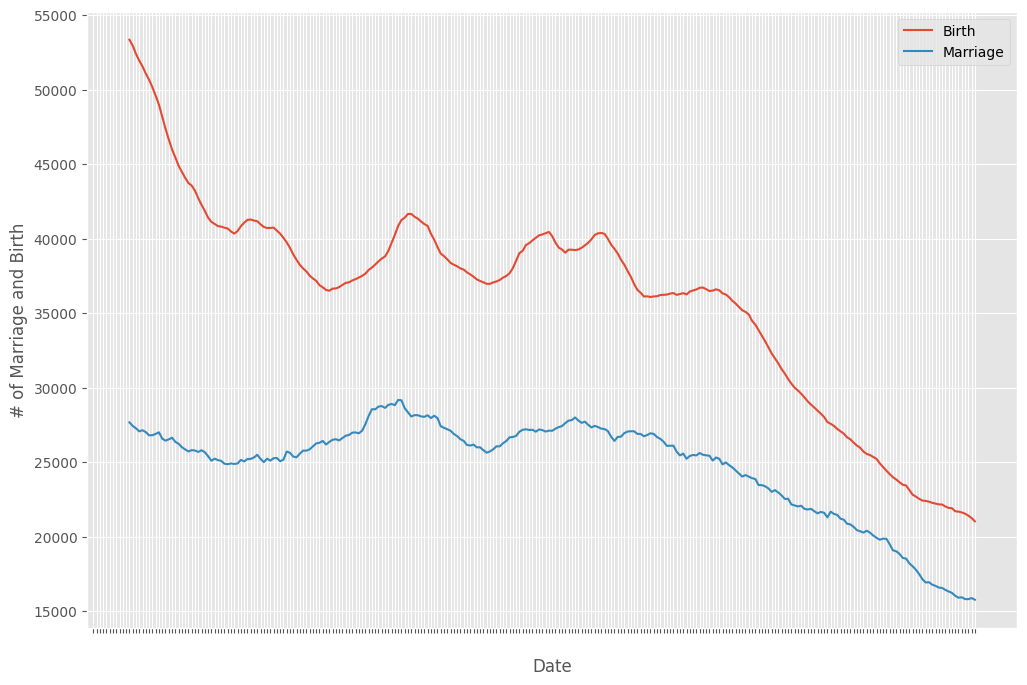

In [29]:
plt.figure(figsize=(12,8))

sns.lineplot(data=countrywide, x='Date', y='birth_rolling', label='Birth')
sns.lineplot(data=countrywide, x='Date', y='marriage_rolling', label='Marriage')

plt.xticks(color='w')
plt.ylabel('# of Marriage and Birth')
plt.legend(loc='upper right')
plt.show()

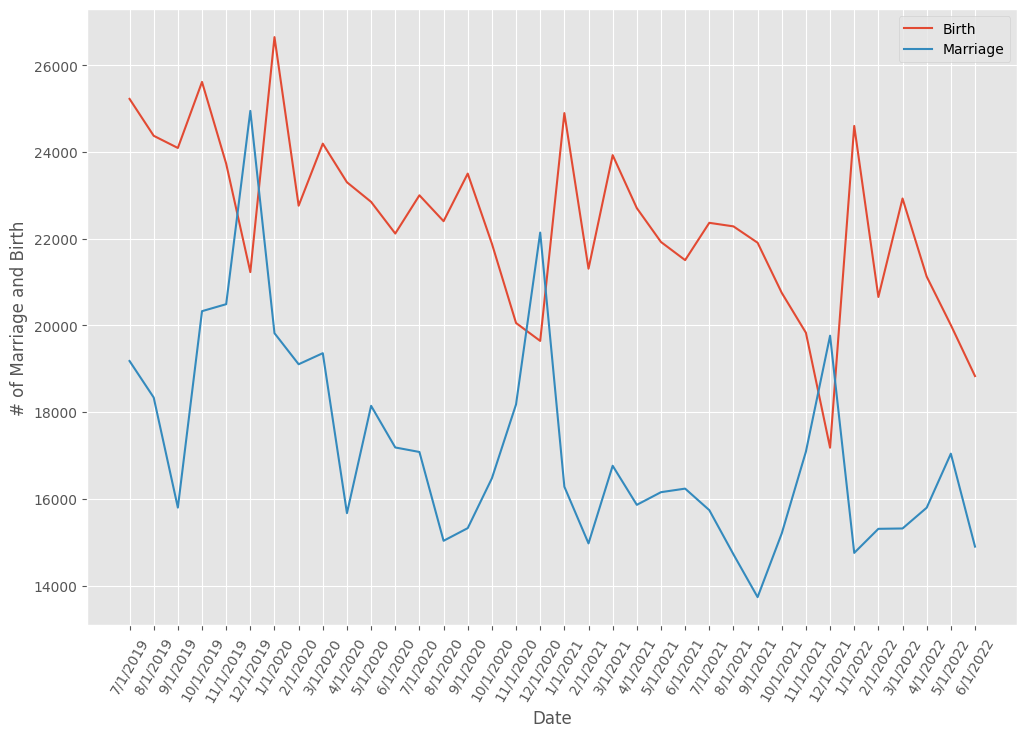

In [30]:
plt.figure(figsize=(12,8))

sns.lineplot(data=countrywide.tail(36), x='Date', y='Birth', label='Birth')
sns.lineplot(data=countrywide.tail(36), x='Date', y='Marriage', label='Marriage')

plt.xticks(rotation=60)
plt.ylabel('# of Marriage and Birth')
plt.legend(loc='upper right')
plt.show()

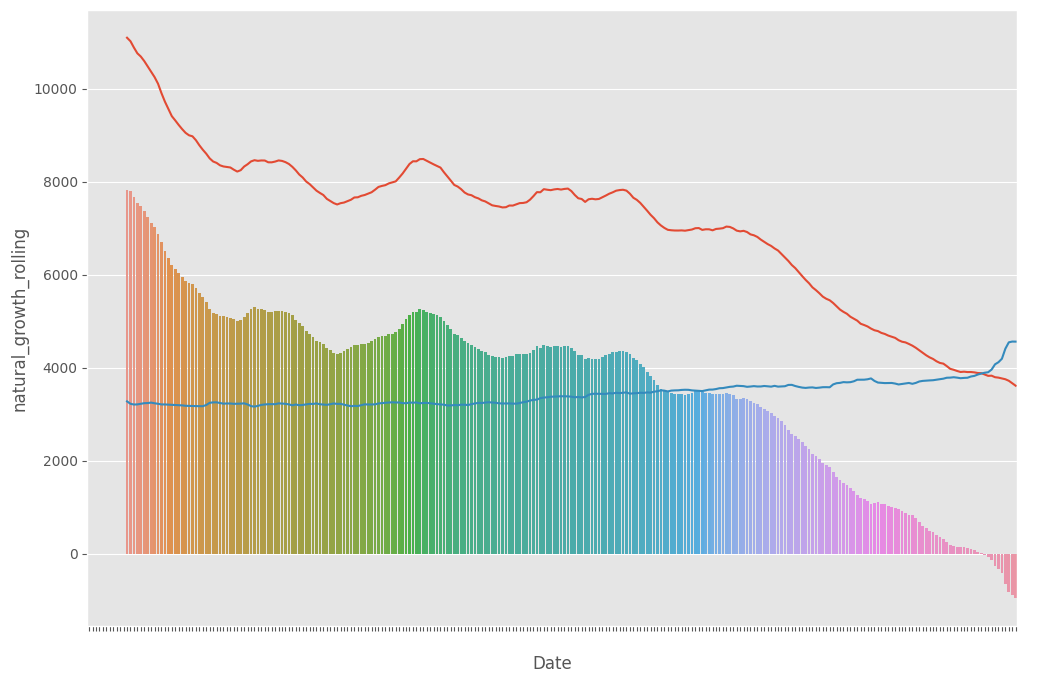

In [32]:
# 2000 ~ 2022년 서울 인구 변화
seoul = df[df.Region == 'Seoul'].copy()
seoul['birth_rolling'] = seoul['Birth'].rolling(12).mean()
seoul['death_rolling'] = seoul['Death'].rolling(12).mean()
seoul['natural_growth_rolling'] = seoul['Natural_growth'].rolling(12).mean()
plt.figure(figsize=(12,8))

sns.lineplot(data=seoul, x='Date', y='birth_rolling')
sns.lineplot(data=seoul, x='Date', y='death_rolling')
sns.barplot(data=seoul, x='Date', y='natural_growth_rolling')

plt.xticks(color='w')
plt.show()

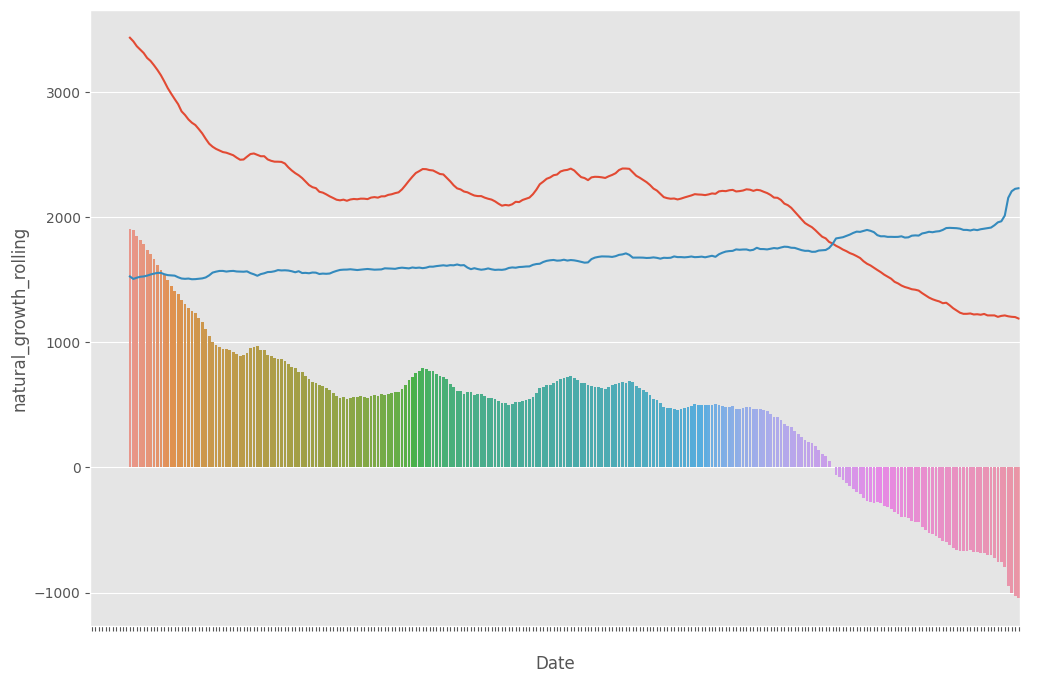

In [35]:
# 2000 ~ 2022년 부산 인구 변화
busan = df[df.Region == 'Busan'].copy()
busan['birth_rolling'] = busan['Birth'].rolling(12).mean()
busan['death_rolling'] = busan['Death'].rolling(12).mean()
busan['natural_growth_rolling'] = busan['Natural_growth'].rolling(12).mean()
plt.figure(figsize=(12, 8))

sns.lineplot(data=busan, x='Date', y='birth_rolling')
sns.lineplot(data=busan, x='Date', y='death_rolling')
sns.barplot(data=busan, x='Date', y='natural_growth_rolling')

plt.xticks(color='w')
plt.show()

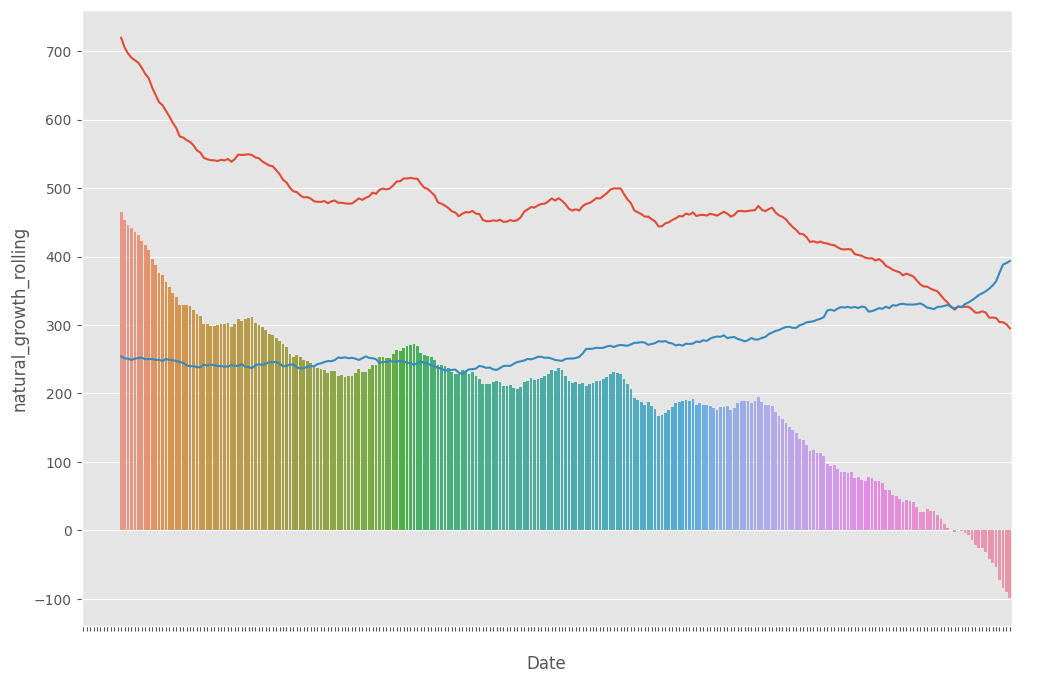

In [36]:
# 2000 ~ 2022년 제주 인구 변화
jeju = df[df.Region == 'Jeju'].copy()
jeju['birth_rolling'] = jeju['Birth'].rolling(12).mean()
jeju['death_rolling'] = jeju['Death'].rolling(12).mean()
jeju['natural_growth_rolling'] = jeju['Natural_growth'].rolling(12).mean()
plt.figure(figsize=(12, 8))

sns.lineplot(data=jeju, x='Date', y='birth_rolling')
sns.lineplot(data=jeju, x='Date', y='death_rolling')
sns.barplot(data=jeju, x='Date', y='natural_growth_rolling')

plt.xticks(color='w')
plt.show()

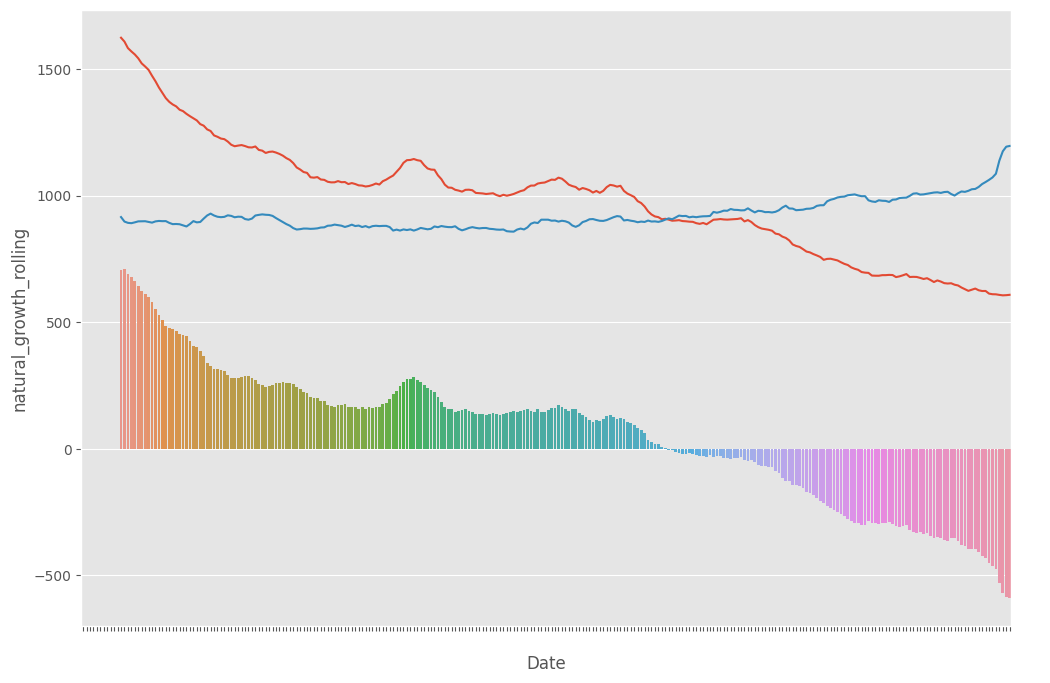

In [37]:
# 2000 ~ 2022년 강원도 인구 변화
gangwon = df[df.Region == 'Gangwon-do'].copy()
gangwon['birth_rolling'] = gangwon['Birth'].rolling(12).mean()
gangwon['death_rolling'] = gangwon['Death'].rolling(12).mean()
gangwon['natural_growth_rolling'] = gangwon['Natural_growth'].rolling(12).mean()
plt.figure(figsize=(12, 8))

sns.lineplot(data=gangwon, x='Date', y='birth_rolling')
sns.lineplot(data=gangwon, x='Date', y='death_rolling')
sns.barplot(data=gangwon, x='Date', y='natural_growth_rolling')

plt.xticks(color='w')
plt.show()

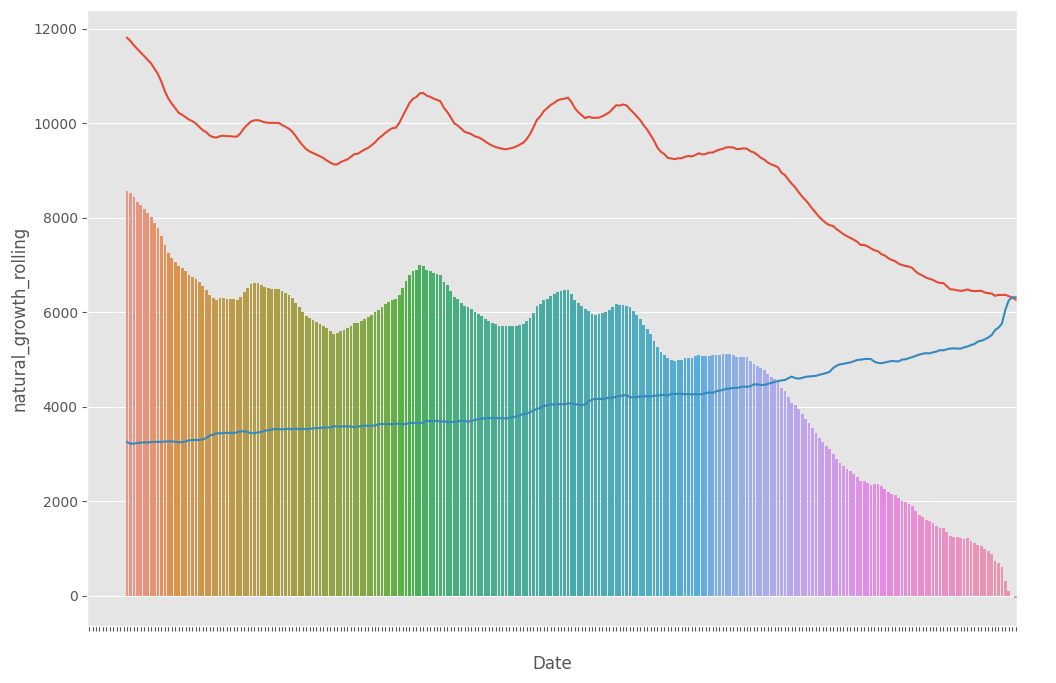

In [38]:
# 2000 ~ 2022년 경기도 인구 변화
gyeonggi = df[df.Region == 'Gyeonggi-do'].copy()
gyeonggi['birth_rolling'] = gyeonggi['Birth'].rolling(12).mean()
gyeonggi['death_rolling'] = gyeonggi['Death'].rolling(12).mean()
gyeonggi['natural_growth_rolling'] = gyeonggi['Natural_growth'].rolling(12).mean()
plt.figure(figsize=(12, 8))

sns.lineplot(data=gyeonggi, x='Date', y='birth_rolling')
sns.lineplot(data=gyeonggi, x='Date', y='death_rolling')
sns.barplot(data=gyeonggi, x='Date', y='natural_growth_rolling')

plt.xticks(color='w')
plt.show()

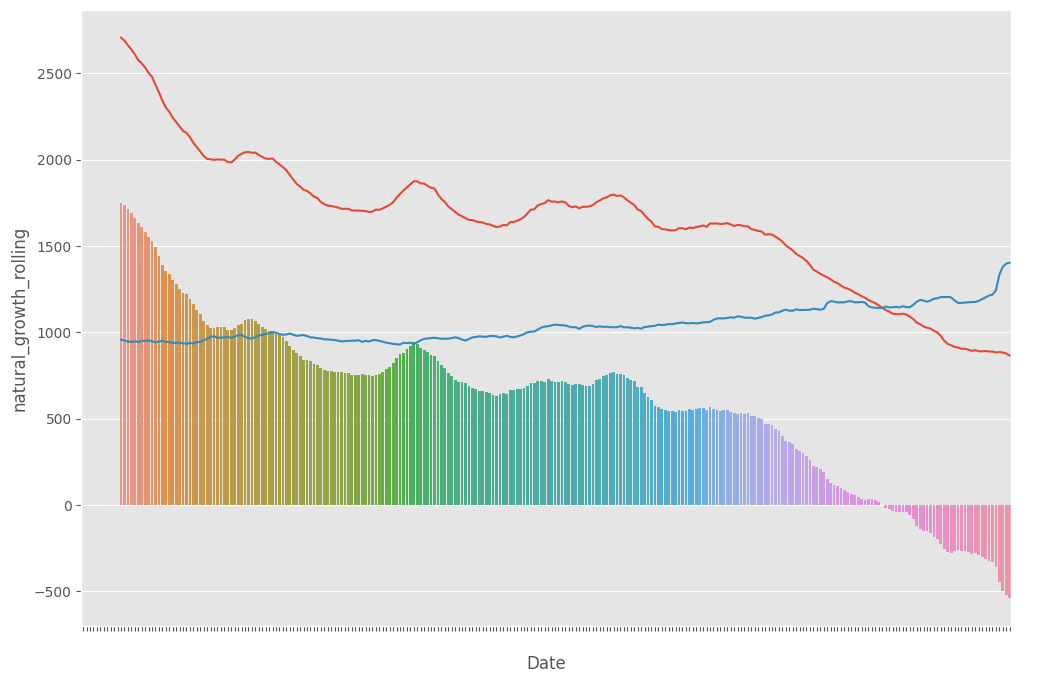

In [40]:
# 2000 ~ 2022년 대구 인구 변화
daegu = df[df.Region == 'Daegu'].copy()
daegu['birth_rolling'] = daegu['Birth'].rolling(12).mean()
daegu['death_rolling'] = daegu['Death'].rolling(12).mean()
daegu['natural_growth_rolling'] = daegu['Natural_growth'].rolling(12).mean()
plt.figure(figsize=(12, 8))

sns.lineplot(data=daegu, x='Date', y='birth_rolling')
sns.lineplot(data=daegu, x='Date', y='death_rolling')
sns.barplot(data=daegu, x='Date', y='natural_growth_rolling')

plt.xticks(color='w')
plt.show()